In [1]:
import cv2

import numpy as np

import mediapipe as mp

#进度条库
from tqdm import tqdm

import time

import matplotlib.pyplot as plt
#使用ipython的魔法方法，将绘制的图像直接嵌入在notebook单元格中
%matplotlib inline

In [2]:
def look_img(img):
    img_RGB = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

In [3]:
mp_face_mesh = mp.solutions.face_mesh
model = mp_face_mesh.FaceMesh(
    static_image_mode=True,       #是静态图片还是连续视频帧
    refine_landmarks=True,        #使用Attention Mesh模型，对嘴唇、眼睛、瞳孔周围的关键点精细定位
    max_num_faces=1,               #最多检测几张脸
    min_detection_confidence=0.5,  #置信度阈值，越接近1越准
    min_tracking_confidence=0.5    #追踪阈值
)
#导入可视化函数和可视化样式
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness = 3,circle_radius = 5,color = [223,155,6])

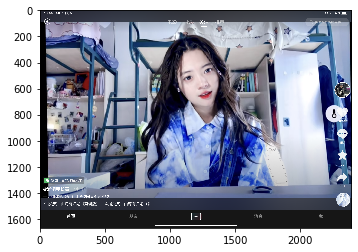

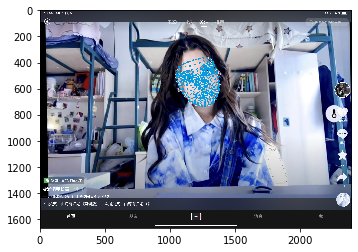

In [4]:
img = cv2.imread('data/demo4.png')
look_img(img)
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

results = model.process(img_RGB)
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image = img,
            landmark_list = face_landmarks,
            connections = mp_face_mesh.FACEMESH_CONTOURS,
            #landmark_drawing_spec 为关键点可视化样式 None为默认值（不显示关键点）
            #landmark_drawing_spec= mp_drawing.DrawingSpec(thickness=1,circle_radius=2,color=[66,77,229])
            landmark_drawing_spec = drawing_spec,
            connection_drawing_spec = drawing_spec
        )
else:
    print('未检测出人脸')

look_img(img)

##### 脸轮廓关键点之间的连接关系

In [5]:
mp_face_mesh.FACEMESH_CONTOURS

frozenset({(0, 267),
           (7, 163),
           (10, 338),
           (13, 312),
           (14, 317),
           (17, 314),
           (21, 54),
           (33, 7),
           (33, 246),
           (37, 0),
           (39, 37),
           (40, 39),
           (46, 53),
           (52, 65),
           (53, 52),
           (54, 103),
           (58, 132),
           (61, 146),
           (61, 185),
           (63, 105),
           (65, 55),
           (66, 107),
           (67, 109),
           (70, 63),
           (78, 95),
           (78, 191),
           (80, 81),
           (81, 82),
           (82, 13),
           (84, 17),
           (87, 14),
           (88, 178),
           (91, 181),
           (93, 234),
           (95, 88),
           (103, 67),
           (105, 66),
           (109, 10),
           (127, 162),
           (132, 93),
           (136, 172),
           (144, 145),
           (145, 153),
           (146, 91),
           (148, 176),
           (149, 150),
   

##### 从results中解析每张脸的每个关键点的信息

In [6]:
results

mediapipe.python.solution_base.SolutionOutputs

In [7]:
# 预测出人脸的个数
len(results.multi_face_landmarks)

1

In [8]:
#所有脸的所有关键点的坐标
results.multi_face_landmarks

[landmark {
   x: 0.5281637907028198
   y: 0.37443414330482483
   z: -0.014558818191289902
 }
 landmark {
   x: 0.5247775316238403
   y: 0.3505442142486572
   z: -0.03139002248644829
 }
 landmark {
   x: 0.5250899791717529
   y: 0.35770076513290405
   z: -0.015605871565639973
 }
 landmark {
   x: 0.5121194124221802
   y: 0.32509610056877136
   z: -0.025937413796782494
 }
 landmark {
   x: 0.5228835344314575
   y: 0.3421609103679657
   z: -0.03388268128037453
 }
 landmark {
   x: 0.519702136516571
   y: 0.33094704151153564
   z: -0.03221670538187027
 }
 landmark {
   x: 0.5111029148101807
   y: 0.30342337489128113
   z: -0.018444804474711418
 }
 landmark {
   x: 0.46666693687438965
   y: 0.32001328468322754
   z: 0.000495263549964875
 }
 landmark {
   x: 0.5047245025634766
   y: 0.2800571322441101
   z: -0.015748748555779457
 }
 landmark {
   x: 0.5019242167472839
   y: 0.2688518166542053
   z: -0.017819222062826157
 }
 landmark {
   x: 0.4917358458042145
   y: 0.23027336597442627
   z:

In [9]:
# 索引为0的脸的关键点坐标
results.multi_face_landmarks[0]

landmark {
  x: 0.5281637907028198
  y: 0.37443414330482483
  z: -0.014558818191289902
}
landmark {
  x: 0.5247775316238403
  y: 0.3505442142486572
  z: -0.03139002248644829
}
landmark {
  x: 0.5250899791717529
  y: 0.35770076513290405
  z: -0.015605871565639973
}
landmark {
  x: 0.5121194124221802
  y: 0.32509610056877136
  z: -0.025937413796782494
}
landmark {
  x: 0.5228835344314575
  y: 0.3421609103679657
  z: -0.03388268128037453
}
landmark {
  x: 0.519702136516571
  y: 0.33094704151153564
  z: -0.03221670538187027
}
landmark {
  x: 0.5111029148101807
  y: 0.30342337489128113
  z: -0.018444804474711418
}
landmark {
  x: 0.46666693687438965
  y: 0.32001328468322754
  z: 0.000495263549964875
}
landmark {
  x: 0.5047245025634766
  y: 0.2800571322441101
  z: -0.015748748555779457
}
landmark {
  x: 0.5019242167472839
  y: 0.2688518166542053
  z: -0.017819222062826157
}
landmark {
  x: 0.4917358458042145
  y: 0.23027336597442627
  z: -0.015206944197416306
}
landmark {
  x: 0.52895653247

##### 获取索引为0的脸的454号关键点坐标

In [10]:
results.multi_face_landmarks[0].landmark[454]

x: 0.5663809776306152
y: 0.28751707077026367
z: 0.06594553589820862

In [11]:
results.multi_face_landmarks[0].landmark[454].x

0.5663809776306152

##### 将相对坐标转为绝对像素坐标，可视化

In [12]:
# 获取图像宽高
h,w = img.shape[0],img.shape[1]
print(h,w)

1668 2388


In [13]:
cx = results.multi_face_landmarks[0].landmark[454].x*w
cx = int(cx)
cx

1352

In [14]:
cy = results.multi_face_landmarks[0].landmark[454].y*h
cy = int(cy)
cy

479

In [15]:
img = cv2.circle(img,(cx,cy),25,(0,0,255),-1)

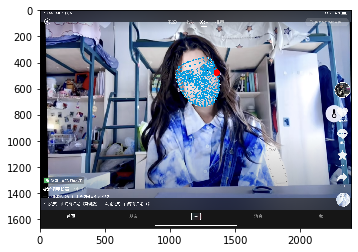

In [16]:
look_img(img)

##### 索引为1的脸的苹果肌

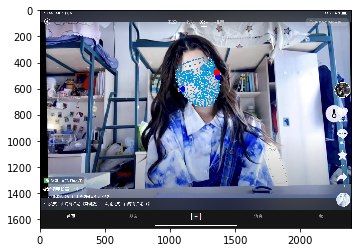

In [17]:
cx = int(results.multi_face_landmarks[0].landmark[123].x*w)
cy = int(results.multi_face_landmarks[0].landmark[123].y*h)
img = cv2.circle(img,(cx,cy),20,(255,0,0),-1)

cx = int(results.multi_face_landmarks[0].landmark[352].x*w)
cy = int(results.multi_face_landmarks[0].landmark[352].y*h)
img = cv2.circle(img,(cx,cy),20,(255,0,0),-1)
look_img(img)

##### 三维可视化

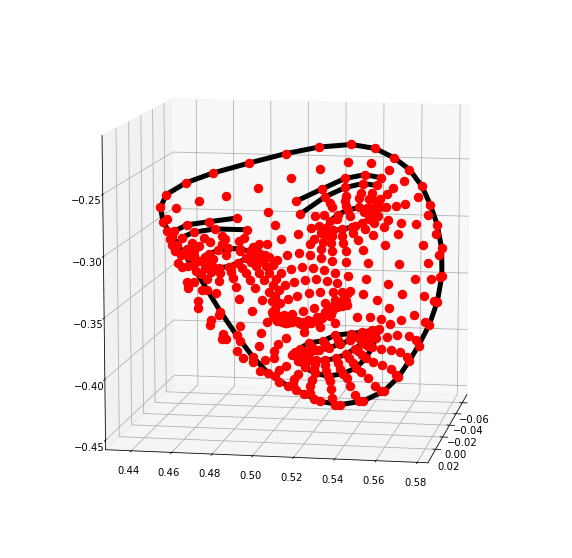

In [18]:
#在三维坐标系中可视化索引为0的脸
from mpl_toolkits.mplot3d import Axes3D
mp_drawing.plot_landmarks(results.multi_face_landmarks[0],mp_face_mesh.FACEMESH_CONTOURS)

##### 交互式三维可视化

In [19]:
coords = np.array(results.multi_face_landmarks[0].landmark)

In [20]:
len(coords)

478

In [21]:
coords

array([x: 0.5281637907028198
       y: 0.37443414330482483
       z: -0.014558818191289902, x: 0.5247775316238403
                                 y: 0.3505442142486572
                                 z: -0.03139002248644829,
       x: 0.5250899791717529
       y: 0.35770076513290405
       z: -0.015605871565639973, x: 0.5121194124221802
                                 y: 0.32509610056877136
                                 z: -0.025937413796782494,
       x: 0.5228835344314575
       y: 0.3421609103679657
       z: -0.03388268128037453, x: 0.519702136516571
                                y: 0.33094704151153564
                                z: -0.03221670538187027,
       x: 0.5111029148101807
       y: 0.30342337489128113
       z: -0.018444804474711418, x: 0.46666693687438965
                                 y: 0.32001328468322754
                                 z: 0.000495263549964875,
       x: 0.5047245025634766
       y: 0.2800571322441101
       z: -0.015748748555779457, x

###### 在不用耗时循环的条件下，如何汇总所有点的XYZ坐标

In [22]:
def get_x(each):
    return each.x
def get_y(each):
    return each.y
def get_z(each):
    return each.z
#分别获取所有关键点的XYZ坐标
points_x = np.array(list(map(get_x,coords)))
points_y = np.array(list(map(get_y,coords)))
points_z = np.array(list(map(get_z,coords)))

#将三个方向的坐标合并
points = np.vstack((points_x,points_y,points_z)).T

In [23]:
points.shape

(478, 3)

In [24]:
points

array([[ 0.52816379,  0.37443414, -0.01455882],
       [ 0.52477753,  0.35054421, -0.03139002],
       [ 0.52508998,  0.35770077, -0.01560587],
       ...,
       [ 0.53542227,  0.26937246,  0.00382784],
       [ 0.53088754,  0.28070152,  0.00382784],
       [ 0.53979564,  0.28559431,  0.00382784]])

In [25]:
import open3d
point_could = open3d.geometry.PointCloud()
point_could.points = open3d.utility.Vector3dVector(points)
open3d.visualization.draw_geometries([point_could])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 
